# Building classifier with Fashion-MNIST datasets
2 types of classifier will be built
- Decision Tree Classifier using Scikit-Learn
- K-Nearest Neighbours Classifier using Scikit-Learn

## Import Fashion-MNIST datasets
Import datasets from keras, faster and easier

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import random
import datetime

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


60000 data for training, 10000 for testing

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As the datasets in 3D, we reshape the array into 2D in order to fit in to Decision Tree and KNN,
28 * 28 = 784

In [4]:
x_train = np.array(x_train).reshape(-1, 784)
x_test = np.array(x_test).reshape(-1, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Visualising the datasets
Showing ramdom item from the datasets

In [5]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sanda",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [56]:
def randNum():
    return random.randint(0,1001)

def plotSammpleData():
    X = x_test[type].reshape(28, 28);
    plt.gray()
    plt.imshow(X)
    plt.show()
    
    print(y_test[type])
    print(label_dict[y_test[type]])
    
def plot_sample(ax, f1, f2, fontsize=12):
    num = randNum()
    ax.axis('off')
    ax.imshow(x_test[num].reshape(28, 28), cmap='gray')
    ax.set_title(label_dict[y_test[num]], fontsize=fontsize)

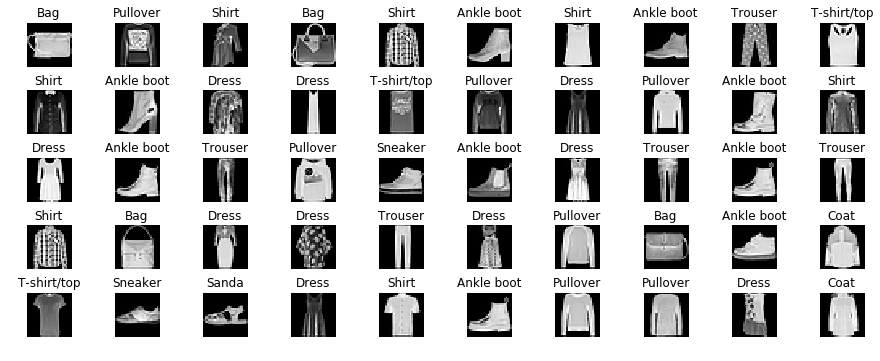

In [57]:
fig, axes = plt.subplots(5,10, figsize=(15,6))
# for attX in [0,1,2,3]:
#     for attY in [0,1,2,3]:
#         plot_sample(axes[attX, attY], attX, attY)
[plot_sample(axes[attX, attY], attX, attY) for attX in range(5) for attY in range(10) ]
fig.subplots_adjust(wspace=1)
plt.show()

### Define ultilities function for developing classifier

In [6]:
#helper function to plot confusion matrix
def plotter(test, output):
    array = metrics.confusion_matrix(test, output)
    #array = preprocessing.scale(array)
    df_cm = pd.DataFrame(array, index = [label_dict[i] for i in label_dict],
                      columns = [label_dict[i] for i in label_dict])
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm.corr(), annot=True, annot_kws={"size": 8}, fmt='.2f')
    plt.savefig('confusion_matrix-decisiontree.png', dpi=600)
    plt.show()

#helper function to perform random prediction on testing datasets
def random_predict(ax, f1, f2, model, fontsize=12):
    num = randNum()
    value = model.predict([x_test[num].reshape(784)])
    ax.axis('off')
    ax.imshow(x_test[num].reshape(28,28), cmap='gray_r')
    ax.set_title("Actual: " + label_dict[y_test[num]] + "\nPrediction: " + label_dict[value[0]], 
                 fontsize=fontsize)

# Decision Tree Classifier

In [6]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
y_test_dt = clf.predict(x_test)

#save model to file
joblib.dump(clf, 'fashion-mnist-model-decisiontree.pkl') 

print("Accuracy: ",metrics.accuracy_score(y_test, y_test_dt))

Accuracy:  0.7877


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


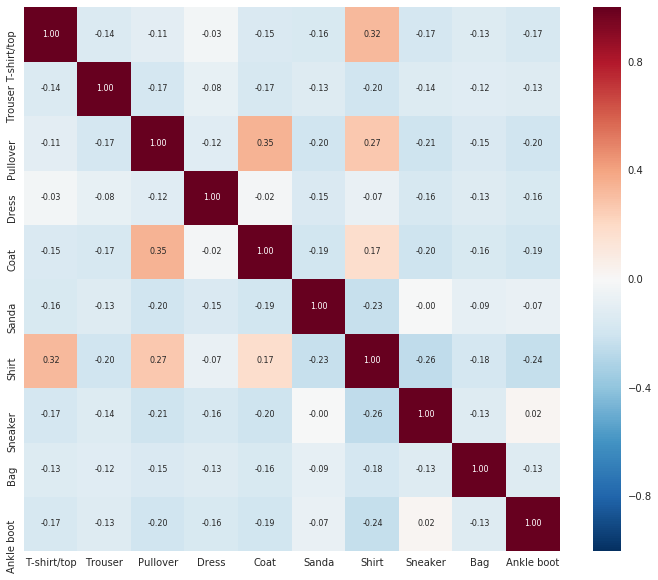

In [37]:
plotter(y_test, y_test_dt)

### Output from Confusion Matrix
The model is quite confused between
- T-shirt/top and Shirt. 
- Coat and Pullover.

### Random predict on testing datasets

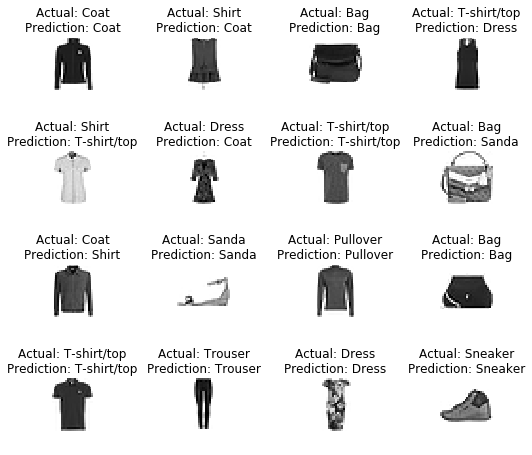

In [32]:
fig, axes = plt.subplots(4,4, figsize=(8,8))
[random_predict(axes[attX, attY], attX, attY, clf) for attX in range(4) for attY in range(4) ]
fig.subplots_adjust(wspace=1.5)
plt.show()

# K-Nearest Neighbours Classifier
try on default value, n_neighbors = 5

In [7]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
y_test_knn = neigh.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_test_knn))

Accuracy :  0.8554


### Finding the best n value
To improve the accuracy, we need to find the optimal n value by using cross validation

In [15]:
#create range from 1-50 and subsetting the odd number
myList = list(range(1,10))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []

### Choose number of fold of K-Fold
Larger K means less bias towards overestimating the true expected error,  choose the default K=3 is reasonable

In [16]:
for k in neighbors:
  date = datetime.datetime.utcnow()
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train, scoring='accuracy')
  cv_scores.append(scores.mean())
  print ("training time :" ,datetime.datetime.utcnow() - date)
  print(scores.mean())
  print("done :", k)

training time : 1:59:45.140263
0.8436166666666667
done : 1
training time : 2:05:18.245814
0.84855
done : 3
training time : 2:07:52.128206
0.8508
done : 5
training time : 2:09:21.977379
0.85115
done : 7
training time : 2:10:00.200597
0.8492333333333333
done : 9


The optimal number of neighbors is 7


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


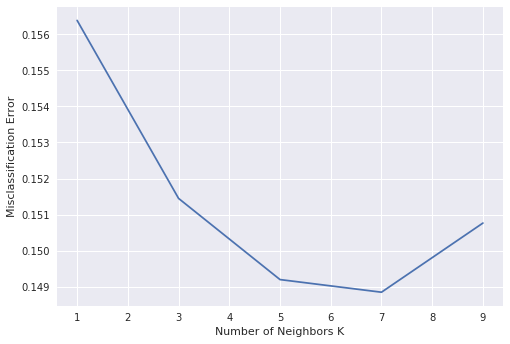

In [51]:
# changing to misclassification error
# 1 - score = error
error = [1 - x for x in cv_scores]
# determining best k

optimal_k = neighbors[error.index(min(errors))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot([1,3,5,7,9], error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Use the optimal n value to train again

In [53]:
neigh = KNeighborsClassifier(n_neighbors=optimal_k)
neigh.fit(x_train, y_train)
y_test_knn = neigh.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_test_knn))

Accuracy :  0.854


It turns out the accuracy is slight lower than using the default value of n

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


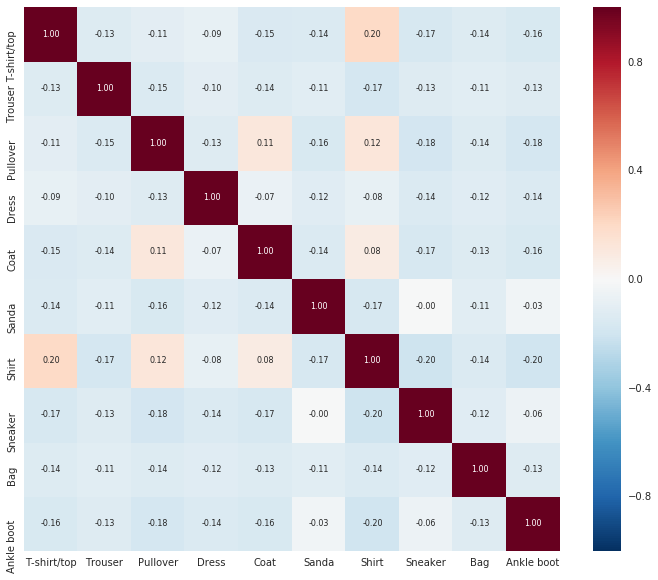

In [54]:
plotter(y_test, y_test_knn)

### Output from Confusion Matrix
The pattern of confusion matrix is better than Decison Tree's with lesser confusion, but they shared the most confused part, which are <br>
- T-shirt/top and Shirt. 
- Coat and Pullover.

### Random predict on testing datasets

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


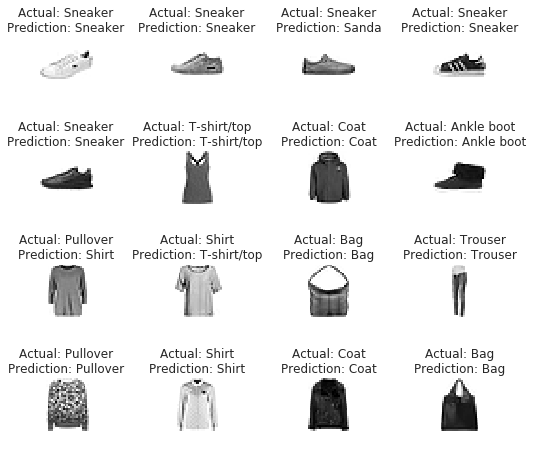

In [57]:
fig, axes = plt.subplots(4,4, figsize=(8,8))
[random_predict(axes[attX, attY], attX, attY, neigh) for attX in range(4) for attY in range(4) ]
fig.subplots_adjust(wspace=1.5)
plt.show()

# Improvement
By using K-Fold cross validation, we are able to find the best n value for K-Nearest Neighbors. We can apply the same concept on Decision Tree as well <br>
Although K-Nearest Neighbors scores higher than Decison Tree, but the predict time is too expensive, and impractical. Most of the case we will still not consider K-Nearest Neighbors when building classifier for production. <br> 
If given more time, I will try to have higher value of fold for cross validation. Also, might try to use neuron network see if can achieve higher accuracy